Insurance Linear Regression

Problem Statement - Find out the insurance charges on the basis of given input

In [1]:
# Import important libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
insurance_data = pd.read_csv('insurance_linear_reg.csv')
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
insurance_data.shape

(1338, 7)

In [5]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


We then create 2 new columns in order to classify the age  and BMI columns. 

In [7]:
def Bmi_Classifier(row):
    if row['bmi'] < 18.5:
        return 'underweight'
    elif row['bmi'] < 25:
        return 'normal'
    elif row['bmi'] < 30:
        return 'overweight'
    else:
        return 'obese'
    
def Age_Classifier(row):
    if row['age'] < 17:
        return 'child'
    elif row['age'] < 31:
        return 'adult'
    elif row['age'] < 46:
        return 'middle-aged'
    else:
        return 'old-aged'

In [10]:
insurance_data['bmi_status'] = insurance_data.apply(Bmi_Classifier,axis=1)
insurance_data['age_status'] = insurance_data.apply(Age_Classifier,axis=1)
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges,bmi_status,age_status
0,19,female,27.900,0,yes,southwest,16884.92400,overweight,adult
1,18,male,33.770,1,no,southeast,1725.55230,obese,adult
2,28,male,33.000,3,no,southeast,4449.46200,obese,adult
3,33,male,22.705,0,no,northwest,21984.47061,normal,middle-aged
4,32,male,28.880,0,no,northwest,3866.85520,overweight,middle-aged


Data Exploration

In [11]:
insurance_data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

Observation - So we have 1064 are non-smokers, and 274 are smokers.

What are the average for the columns based on whether the patient is a smoker or not ?

In [13]:
smoker_data = insurance_data.groupby('smoker').mean().round(2)
smoker_data.head()

,age,bmi,children,charges
smoker,,,,
no,39.39,30.65,1.09,8434.27
yes,38.51,30.71,1.11,32050.23


Observation - We can see here that the average cost for a smoker is 32050.23 dollars which is 3.8 ti,es more than the average cost of non-smokers, with 8434.27 dollars.

Lets look at how the data is distributed between the number of childrenand the charges based if the patient  smokes or not.

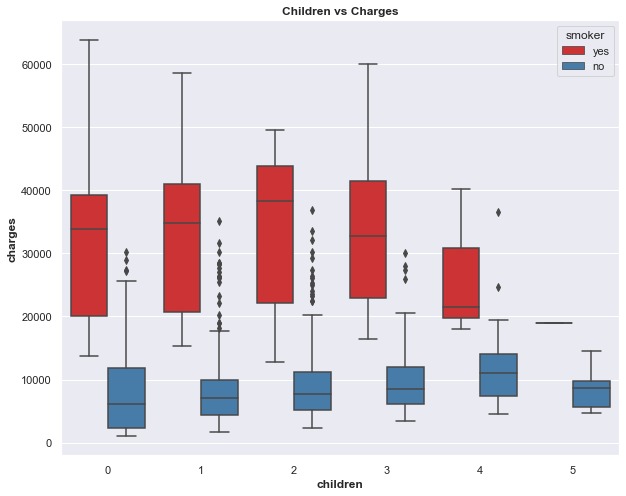

In [16]:
fig = plt.figure(figsize=(10,8));
sns.set_theme()

sns.boxplot(data = insurance_data, x='children',y='charges',hue='smoker',palette='Set1');
plt.xlabel('children',fontweight='bold');
plt.ylabel('charges',fontweight='bold');
plt.title('Children vs Charges', fontweight='bold');

Observation - There doesnot seem to be a significant difference when the number of children inceases. 

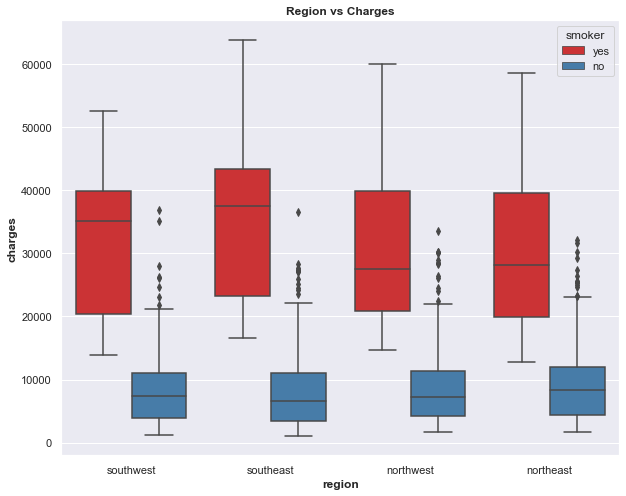

In [17]:
fig = plt.figure(figsize=(10,8));
sns.set_theme()

sns.boxplot(data = insurance_data, x='region',y='charges',hue='smoker',palette='Set1');
plt.xlabel('region',fontweight='bold');
plt.ylabel('charges',fontweight='bold');
plt.title('Region vs Charges', fontweight='bold');

Observation - There doesnot seem to be much of a diffrence. we can see that non-smokers never pass the 40,000 dollar level ,while smokers never go below 10000 dollar.

lets create a pairplot to see if there are any strong correlations.

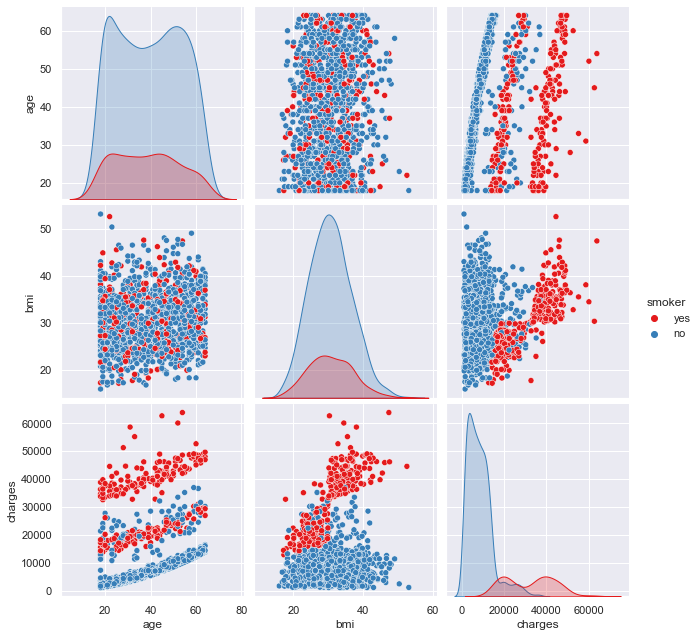

In [24]:
sns.pairplot(insurance_data[['age','bmi','charges','smoker']],hue='smoker',height=3,palette='Set1');

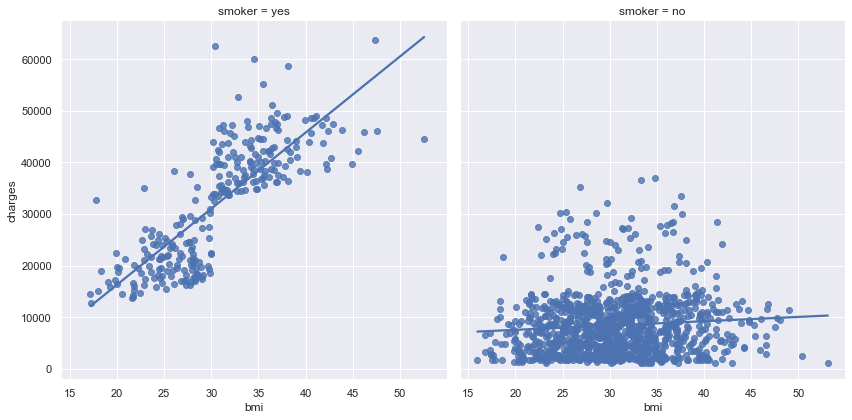

In [25]:
sns.lmplot(data=insurance_data,x='bmi',y='charges',col='smoker',palette='Set1',height=6,ci=None);

Observation - bmi and charges looks very intresting and it seems to have a very strong positive correlation.

Heatmap - to find out exactly is the number ? 

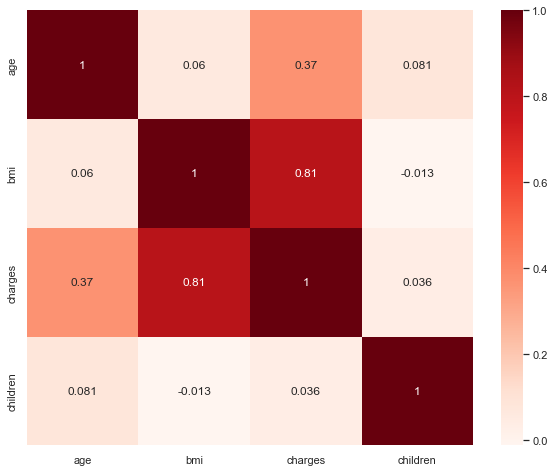

In [30]:
plt.figure(figsize=(10,8));
df = insurance_data[insurance_data['smoker']=='yes'][['age','bmi','charges','children']].corr()
sns.heatmap(data=df,cmap='Reds',annot= True);

Observation - As expected bmi has the highest correlation for smokers when it comes to charges, and we can now see that it has a moderate to high.

Linear Regression - 

i will now begin working on the regression model, which will be based on the smokers as opposed to non-smokers. This will make this model a bit more accurate, but only be applicable when predicting future values for smokers.

In [31]:
# Creating numeric columns for the different categories

In [33]:
insurance_data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'bmi_status', 'age_status'],
      dtype='object')

In [34]:
df1 = insurance_data[insurance_data['smoker']=='yes'][['sex','region','bmi_status','age_status','charges','children']]

new_insurance_data = pd.get_dummies(df1,columns=['sex','region','bmi_status','age_status','children'])

new_insurance_data.head()

,charges,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest,bmi_status_normal,bmi_status_obese,bmi_status_overweight,bmi_status_underweight,age_status_adult,age_status_middle-aged,age_status_old-aged,children_0,children_1,children_2,children_3,children_4,children_5
0,16884.9240,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0
11,27808.7251,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0
14,39611.7577,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0
19,36837.4670,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0
23,37701.8768,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0


Building the Regression model

In [42]:
X = new_insurance_data.drop('charges',axis=1).values

y = new_insurance_data['charges']

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.80,test_size=0.20,random_state=15)

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
lm = LinearRegression()

In [47]:
lm.fit(X_train,y_train)

LinearRegression()

In [48]:
y_pred = lm.predict(X_train)

In [49]:
y_pred

array([45952., 43936., 45856., 46400., 39296., 19600., 46400., 42048.,
       36560., 17632., 22352., 46192., 44256., 44576., 42016., 22448.,
       38032., 41504., 36768., 40560., 37472., 26704., 42912., 37952.,
       26928., 18368., 36064., 16144., 20240., 45216., 25312., 36064.,
       26928., 14576., 17856., 46192., 27248., 24416., 27024., 37952.,
       42432., 41312., 42912., 46240., 21120., 44048., 42432., 37472.,
       23008., 45504., 20528., 36768., 38240., 24176., 25552., 42976.,
       37712., 45824., 45216., 44768., 17456., 21584., 23024., 42432.,
       43616., 19872., 21168., 14400., 35872., 45952., 37712., 22272.,
       40560., 46080., 21856., 24336., 42656., 17728., 19824., 37088.,
       37056., 24464., 21408., 21424., 19536., 36768., 42976., 19008.,
       14400., 37712., 17632., 43904., 37056., 42416., 36560., 36064.,
       28272., 20944., 36064., 47104., 41760., 37632., 45056., 42432.,
       19312., 41504., 24048., 26176., 41504., 23440., 25072., 23248.,
      

Observation - Now we have built  our model, let's  measure  the accuracy.

Accuracy of the Model



we measure the accuracyof the model using

    1. overall score 
    2. Root mean squared error
    3. Mean absolute error

In [60]:
from math import sqrt
from sklearn.metrics import r2_score,explained_variance_score,mean_absolute_error,mean_squared_error

In [61]:
print('The accuracy on the training data:',lm.score(X_train, y_train).round(3))
print('The accuracy on the testing data:',lm.score(X_test, y_test).round(3))
print(' ')
print('Root Mean Squared Error (RMSE)')
print('The RMSE on the training dataset:', round(sqrt(mean_squared_error(y_train, y_pred)),3))
print('The RMSE on the testing dataset:', round(sqrt(mean_squared_error(y_test, lm.predict(X_test))),3))
print(' ')
print('Mean Absolute Error (MAE)')
print('The MAE on the training dataset:', mean_absolute_error(y_train, y_pred).round(3))
print('The MAE on the testing dataset:', mean_absolute_error(y_test, lm.predict(X_test)).round(3))

The accuracy on the training data: 0.88
The accuracy on the testing data: 0.802
 
Root Mean Squared Error (RMSE)
The RMSE on the training dataset: 3980.594
The RMSE on the testing dataset: 5196.558
 
Mean Absolute Error (MAE)
The MAE on the training dataset: 2620.603
The MAE on the testing dataset: 3299.581


C:\Users\prade\AppData\Local\Temp/ipykernel_10484/3895992273.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_train.min(), y_train.max()],


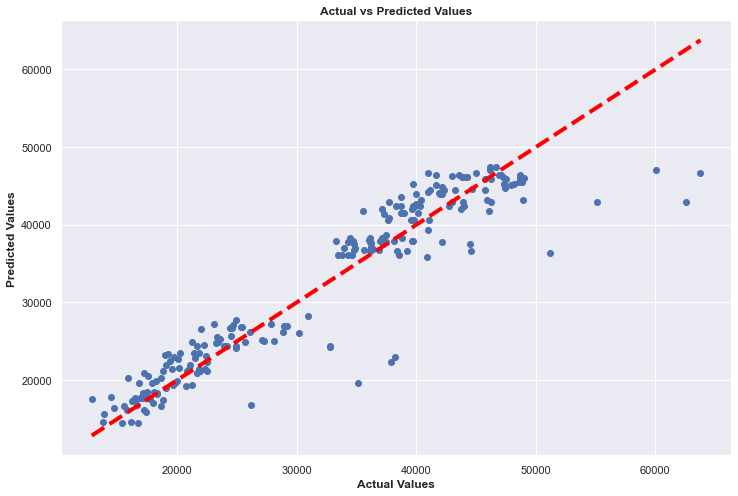

In [74]:
plt.figure(figsize = (12,8))
plt.scatter(y_train, y_pred);

plt.plot([y_train.min(), y_train.max()], 
         [y_train.min(), y_train.max()], 
         'k--', 
         c = 'red',
         lw = 4);

plt.xlabel('Actual Values', fontweight = 'bold');
plt.ylabel('Predicted Values', fontweight = 'bold');
plt.title('Actual vs Predicted Values', fontweight = 'bold')
plt.show()

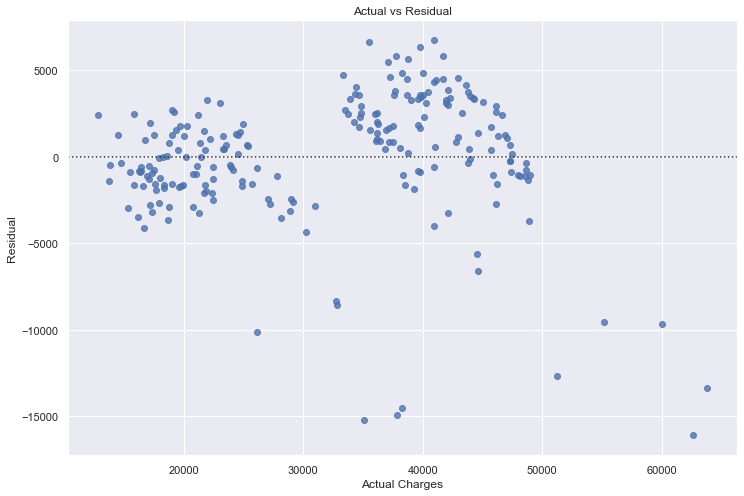

In [73]:
plt.figure(figsize=(12,8));

sns.residplot(y_train,y_pred,line_kws={'color':'red'});

plt.xlabel('Actual Charges')
plt.ylabel('Residual')
plt.title('Actual vs Residual')
plt.show()

# Predicting Insurance Costs


Now that we have a successful model, lets apply it and predict the costs based on whatever parameters we set

In [79]:
X2 = new_insurance_data.drop('charges',axis=1)

Inter = lm.intercept_
coeff = lm.coef_
coeff = coeff.reshape(-1,19)

coeff_df = pd.DataFrame(coeff,columns=[X2.columns])

In [80]:
coeff_df

,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest,bmi_status_normal,bmi_status_obese,bmi_status_overweight,bmi_status_underweight,age_status_adult,age_status_middle-aged,age_status_old-aged,children_0,children_1,children_2,children_3,children_4,children_5
0,9.466752e+16,9.466752e+16,1.588729e+17,1.588729e+17,1.588729e+17,1.588729e+17,-3.674078e+16,-3.674078e+16,-3.674078e+16,-3.674078e+16,-6.439539e+16,-6.439539e+16,-6.439539e+16,-2.564558e+16,-2.564558e+16,-2.564558e+16,-2.564558e+16,-2.564558e+16,-2.564558e+16


Now that we have all our coefficient and the intercept, we can create our prediction formula. By changing the values for the variables, we can predict the cost for the patient

In [82]:
sex = ['sex_female']
children = ['children_2']
region = ['region_southwest']
bmi_status = ['bmi_status_normal']
age_status = ['age_status_middle-aged']

pred1 = (Inter) + (coeff_df[sex].values[0]*1) + (coeff_df[children].values[0]*1) + (coeff_df[region].values[0]*1) +(coeff_df[bmi_status].values[0]*1)+ (coeff_df[age_status].values[0]*1)

print('Your Protected Insurance cost is',pred1[0].round(2),'dollars')

Your Protected Insurance cost is 20304.0 dollars


# Conclusion and Notes

While this model is relatively accurate, with over 80% accuracy, we must keep in mind that it can only be applied to smokers. 
If i attempt to use the same code and apply the model for the dataset, smokers and non-smokers, the accuracy drops to 70%.

In [84]:
import pickle
# open a file, where you want to score the data
file = open('InsurancePrediction_linear_regression.pkl','wb')

#dump information to that file
pickle.dump(lm,file)